Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mimg

%matplotlib inline

Show image

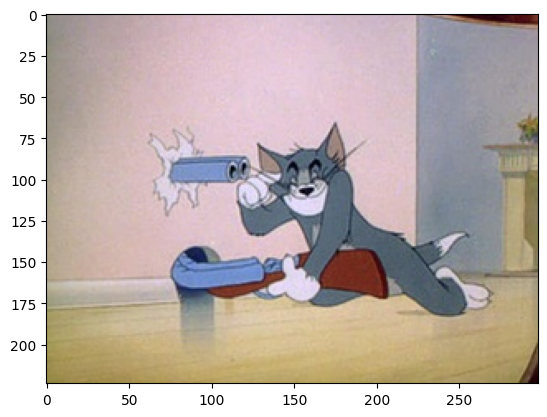

In [2]:
image = Image.open("test2.jpg")

def display_image(image):
    plt.imshow(image)
    plt.show()

display_image(image)

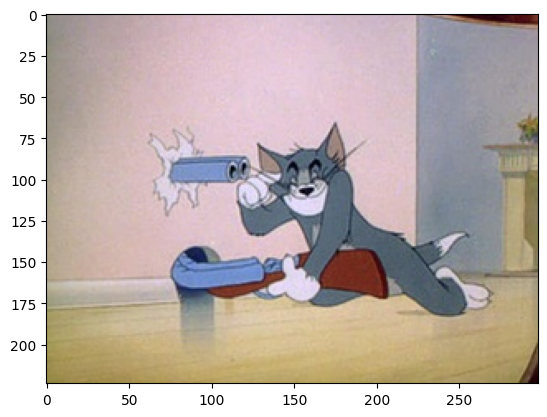

In [5]:
plt.imshow(np.array(image))

In [6]:
img_np = np.array(image)
img_np = np.float32(img_np)

img_np

array([[[141., 142., 124.],
        [141., 142., 124.],
        [146., 142., 130.],
        ...,
        [117.,  54.,  39.],
        [124.,  61.,  46.],
        [130.,  67.,  50.]],

       [[141., 142., 126.],
        [142., 143., 127.],
        [146., 142., 130.],
        ...,
        [112.,  48.,  36.],
        [118.,  55.,  40.],
        [121.,  58.,  41.]],

       [[140., 141., 127.],
        [141., 142., 128.],
        [146., 142., 131.],
        ...,
        [109.,  47.,  36.],
        [115.,  53.,  40.],
        [118.,  56.,  41.]],

       ...,

       [[150., 139.,  73.],
        [149., 138.,  72.],
        [150., 136.,  71.],
        ...,
        [ 32.,   3.,   5.],
        [ 34.,   5.,   9.],
        [ 31.,   2.,   6.]],

       [[151., 140.,  74.],
        [150., 139.,  73.],
        [148., 137.,  71.],
        ...,
        [ 31.,   5.,   6.],
        [ 33.,   7.,  10.],
        [ 27.,   0.,   5.]],

       [[143., 132.,  66.],
        [143., 132.,  66.],
        [143., 1

In [7]:
img_np.shape

(224, 298, 3)

Initializing means

In [9]:
def initialize_means(img_np, clusters):
    # Reshaping or flattening it into a 2d matrix
    pixels = img_np.reshape((-1,3))
    pixels = np.float32(pixels)
    m, n =  pixels.shape
 
    # Mean: array of assumed means or centroids.
    means = np.zeros((clusters, n))
 
    # Randomized initialization of means.
    for i in range(0,clusters):
        rand_indices = np.random.choice(m, size=10, replace=False)
        means[i] = np.mean(pixels[rand_indices], axis=0)
    return pixels, means
    

Calculate Euclidean distance

In [10]:
def calc_distance(x1, y1, x2, y2):
    distance = np.square(x1 - x2) + np.square(y1 - y2)
    distance = np.sqrt(distance)
    return distance

Implementing K-means

In [11]:
def k_means(pixels, means, clusters):
    iter = 10  # The number of iterations
    m, n = pixels.shape
 
    # Index values that correspond to the cluster to which each pixel belongs to.
    index = np.zeros(m)
 
    # K-means 
    while iter > 0:
        for j in range(m):
            min_dist = float('inf')
 
            for k in range(clusters):
                x1, y1 = pixels[j, 0], pixels[j, 1]
                x2, y2 = means[k, 0], means[k, 1]
 
                if calc_distance(x1, y1, x2, y2) <= min_dist:
                    min_dist = calc_distance(x1, y1, x2, y2)
                    index[j] = k
 
        for k in range(0,clusters):
            cluster_points = pixels[index == k]
            if len(cluster_points) > 0:
                means[k] = np.mean(cluster_points, axis=0)
        iter -= 1
    return means, index

In [12]:
def save_img(img_np, clusters):
    filename = f"result{clusters}.jpg" 
    mimg.imsave(filename, img_np)

In [28]:
def save_pdf(img_np, clusters):
    filename = f"result{clusters}.pdf" 
    mimg.imsave(filename, img_np)

In [13]:
def compress_img(means, index, img_np, clusters):
    centroid = np.array(means)
    recovered = centroid[index.astype(np.int32), :]
    # Getting back the 3d matrix (row, col, RGB)
    
    recovered = (recovered / 255).reshape(img_np.shape)
    # Plotting the compressed image.

    display_image(recovered)
    save_img(recovered, clusters)
    

In [29]:
def compress_pdf(means, index, img_np, clusters):
    centroid = np.array(means)
    recovered = centroid[index.astype(np.int32), :]
    # Getting back the 3d matrix (row, col, RGB)
    
    recovered = (recovered / 255).reshape(img_np.shape)
    # Plotting the compressed image.

    display_image(recovered)
    save_pdf(recovered, clusters)
    

Cluster = 3 

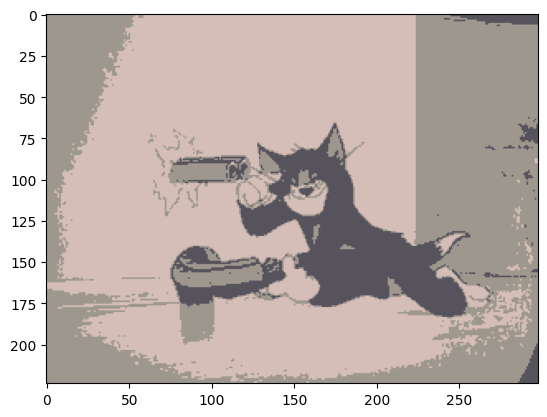

In [14]:
pixels, means = initialize_means(img_np,3)
means, index = k_means(pixels, means,3)
compress_img(means, index, img_np, 3)

Cluster = 5

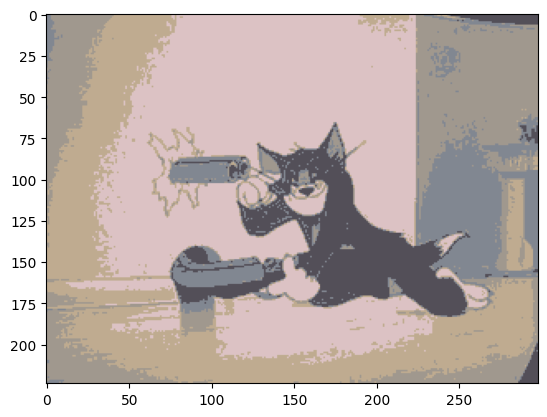

In [15]:
pixels, means = initialize_means(img_np,5)
means, index = k_means(pixels, means,5)
compress_img(means, index, img_np, 5)

Cluster = 7

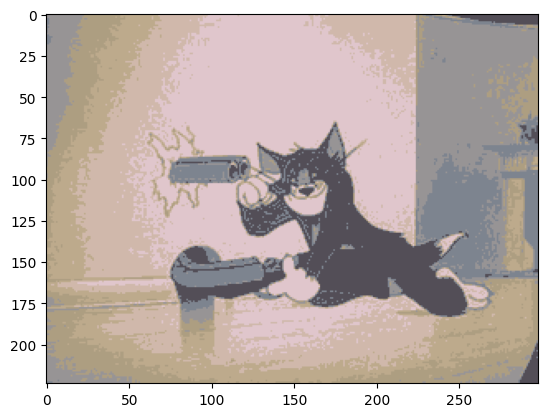

In [16]:
pixels, means = initialize_means(img_np,7)
means, index = k_means(pixels, means,7)
compress_img(means, index, img_np, 7)

Main function:

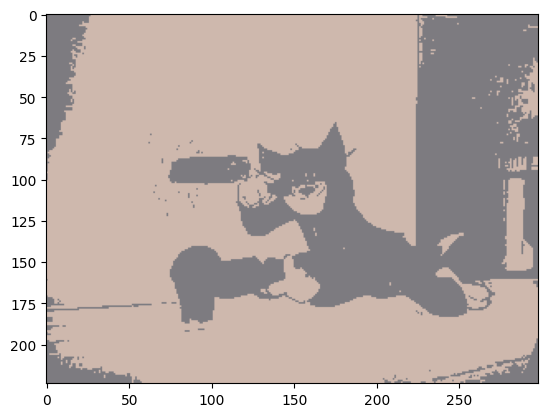

In [31]:
if __name__ == '__main__':
    filename = input("Enter filename: ")
    image = Image.open(filename)
    img_np = np.array(image)
    img_np = np.float32(img_np)

    clusters = 16
    clusters = int(input('Enter the number of clusters (default = 16): '))
    
    pixels, means = initialize_means(img_np,clusters)
    means, index = k_means(pixels,means,clusters)
    
    fmt = ''
    while (fmt != "jpg" or fmt != "pdf"):
        fmt = input("Enter file saving format ( jpg / pdf ) :" )
        if fmt == "jpg": 
            compress_img(means, index, img_np, clusters)
            break
        elif fmt == "pdf":
            compress_pdf(means, index, img_np, clusters)
            break
        else:
            print("Invalid file format, please re-enter:" )